<table style="width:100%;">
  <tr>
    <td style="text-align:left; width:33%;">
      <img src="./logo/univ.png" alt="Logo gauche" width="200">
    </td>
    <td style="text-align:center; width:33%;">
      <img src="./logo/but-sd.png" alt="Logo centre" width="200">
    </td>
    <td style="text-align:right; width:33%;">
      <img src="./logo/iut-villetaneuse.png" alt="Logo droite" width="320">
    </td>
  </tr>
</table>

---

📘 Projet : SAÉ 2.03 – Régression sur données réelles

- **Nom :** BENKHERFELLAH  
- **Prénom :** Ibrahim  
- **Groupe :** Praxis 2 <br></br>
- **Département** : Science des Données
- **Établissement :** Université Sorbonne Paris Nord – IUT de Villeuniversité

**Date** : Mai 2025

---

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Pallette de couleurs :
vert = "#5FC2BA"
bleu = "#3B556D"
jaune = "#FEEAA1"

In [3]:
# DataFrame --> Importation des donneés depuis le CSV
df = pd.read_csv("../data/data.csv")

In [4]:
# Point Info
print(
    f"Le fichier data comporte {df.shape[0]} lignes\nAinsi que {df.shape[1]} colonnes"
)

Le fichier data comporte 569 lignes
Ainsi que 32 colonnes


# Voici un petit descriptif des différentes colonnes

## Colonnes du fichier

| Colonne                        | Traduction en français                 | Description                                                                 |
|-------------------------------|----------------------------------------|-----------------------------------------------------------------------------|
| `id`                          | Identifiant                            | Numéro unique d'identification du patient.                                 |
| `diagnosis`                   | Diagnostic                             | Résultat du diagnostic : M = Malin (cancer), B = Bénin (non cancéreux).    |

## Caractéristiques morphologiques des tumeurs

### Moyennes (`*_mean`)

| Colonne                        | Traduction en français                   | Description                                                                 |
|-------------------------------|------------------------------------------|-----------------------------------------------------------------------------|
| `radius_mean`                 | Rayon moyen                              | Distance moyenne du centre vers le bord de la tumeur.                      |
| `texture_mean`               | Texture moyenne                          | Variation des niveaux de gris (granularité de l’image).                    |
| `perimeter_mean`             | Périmètre moyen                          | Périmètre moyen de la tumeur.                                              |
| `area_mean`                  | Surface moyenne                          | Surface occupée par la tumeur.                                             |
| `smoothness_mean`           | Lissage moyen                            | Régularité des contours.                                                  |
| `compactness_mean`          | Compacité moyenne                        | Mesure de la compacité des contours.                                       |
| `concavity_mean`            | Concavité moyenne                        | Gravité des zones concaves dans les contours de la tumeur.                |
| `concave points_mean`       | Points concaves moyens                  | Nombre moyen de points concaves.                                           |
| `symmetry_mean`             | Symétrie moyenne                         | Mesure de la symétrie de la tumeur.                                        |
| `fractal_dimension_mean`    | Dimension fractale moyenne               | Complexité du contour (valeurs proches de 1 indiquent une forme simple).   |

### Écart-type (`*_se`)

| Colonne                        | Traduction en français                   | Description                                                                 |
|-------------------------------|------------------------------------------|-----------------------------------------------------------------------------|
| `radius_se`                   | Écart-type du rayon                      | Variation du rayon.                                                         |
| `texture_se`                 | Écart-type de la texture                 | Variation de la texture.                                                    |
| `perimeter_se`               | Écart-type du périmètre                  | Variation du périmètre.                                                     |
| `area_se`                    | Écart-type de la surface                 | Variation de la surface.                                                    |
| `smoothness_se`             | Écart-type du lissage                   | Variation du lissage.                                                       |
| `compactness_se`            | Écart-type de la compacité              | Variation de la compacité.                                                  |
| `concavity_se`              | Écart-type de la concavité              | Variation de la concavité.                                                  |
| `concave points_se`         | Écart-type des points concaves          | Variation du nombre de points concaves.                                     |
| `symmetry_se`               | Écart-type de la symétrie               | Variation de la symétrie.                                                   |
| `fractal_dimension_se`      | Écart-type de la dimension fractale     | Variation de la dimension fractale.                                         |

### Valeurs extrêmes (`*_worst`)

| Colonne                        | Traduction en français                   | Description                                                                 |
|-------------------------------|------------------------------------------|-----------------------------------------------------------------------------|
| `radius_worst`               | Rayon maximal                            | Valeur maximale du rayon.                                                   |
| `texture_worst`             | Texture maximale                         | Valeur maximale de la texture.                                              |
| `perimeter_worst`           | Périmètre maximal                        | Valeur maximale du périmètre.                                               |
| `area_worst`                | Surface maximale                         | Surface maximale occupée.                                                   |
| `smoothness_worst`         | Lissage maximal                          | Lissage maximal observé.                                                    |
| `compactness_worst`        | Compacité maximale                       | Valeur maximale de la compacité.                                            |
| `concavity_worst`          | Concavité maximale                       | Valeur maximale de la concavité.                                            |
| `concave points_worst`     | Points concaves maximaux                 | Nombre maximal de points concaves.                                          |
| `symmetry_worst`           | Symétrie maximale                        | Symétrie maximale observée.                                                 |
| `fractal_dimension_worst`  | Dimension fractale maximale              | Complexité maximale du contour.                                             |


---

# Quelque petit tests

Commencons par faire quelque calculs de moyenne afin d'essayer de voir comment sont répartis les données :

In [17]:
area_moy = round(float(df["area_mean"].mean()), 3)
print(f"L'étandue moyenne des tumeurs est de {area_moy}")

L'étandue moyenne des tumeurs est de 654.889


In [20]:
peri_worst_moy = round(float(df["perimeter_worst"].mean()), 3)
print(f"La moyenne des pires moyenne de périmètre de tumeur est de {peri_worst_moy}")

La moyenne des pires moyenne de périmètre de tumeur est de 107.261


In [22]:
smoothness_moy = round(float(df["smoothness_mean"].mean()), 3)
print(f"La moyenne des pires moyenne de périmètre de tumeur est de {smoothness_moy}")

La moyenne des pires moyenne de périmètre de tumeur est de 0.096


---

# Travail Exploratoire

## Question 1 : Représenter graphiquement la proportion de tumeurs malignes et de tumeurs bénignes.

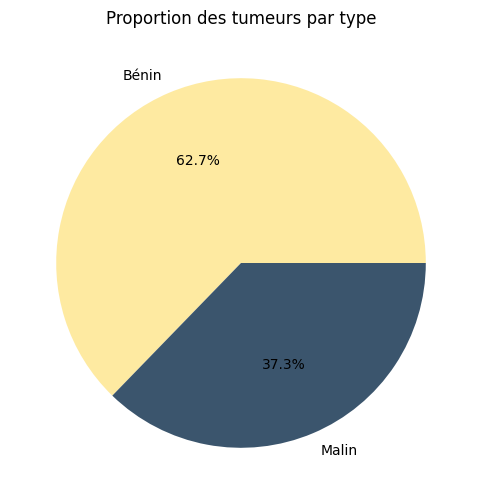

In [39]:
# On compte les valeurs du diagnostic
diagnosis_counts = df["diagnosis"].value_counts()

# Pie chart
part_tumeurs = diagnosis_counts.plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(6, 6),
    labels=["Bénin", "Malin"],
    colors=[jaune, bleu],
    title="Proportion des tumeurs par type",
    ylabel="",
)

## Question 2 : Tracer puis analyser l'histogramme du rayon (radius_mean)

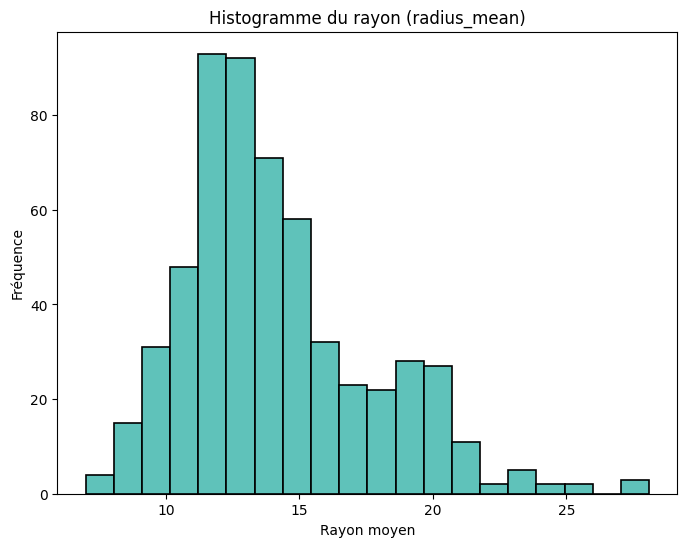

In [6]:
# On sélectionne la colonne `radius_mean`
radius_mean = df["radius_mean"]

# Création du Graphique
radius_mean_plot = radius_mean.plot(
    kind="hist",
    figsize=(8, 6),
    title="Histogramme du rayon (radius_mean)",
    xlabel="Rayon moyen",
    ylabel="Fréquence",
    bins=20,
    edgecolor="black",
    linewidth=1.2,
    color=vert,
)

## Question 3 : Tracer, sur le même graphique, l'histogramme du rayon (radius_mean) en utilisant deux couleurs différentes pour différencier les tumeurs malignes (M) et des bénignes (B).

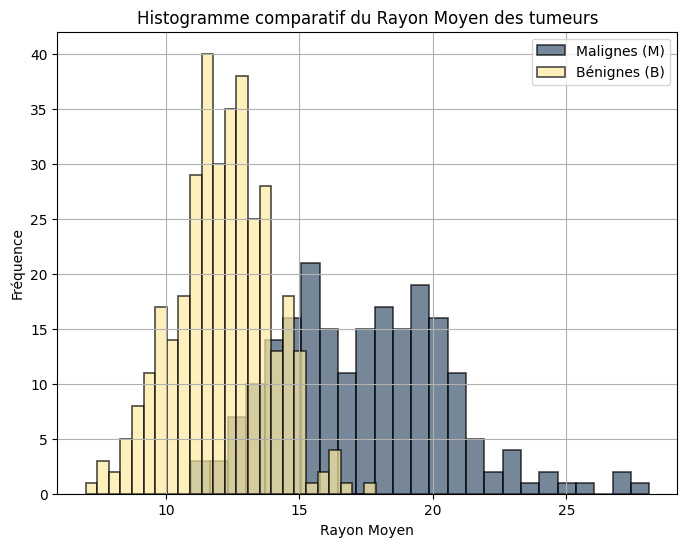

In [10]:
# Séparation des données selon le diagnostic
malignes = df[df["diagnosis"] == "M"]["radius_mean"]
benignes = df[df["diagnosis"] == "B"]["radius_mean"]

# Création du graphique
plt.figure(figsize=(8, 6))

# Histogramme des tumeurs malignes
plt.hist(
    malignes,
    bins=25,
    color=bleu,
    edgecolor="black",
    linewidth=1.2,
    alpha=0.7,
    label="Malignes (M)",
)

# Histogramme des tumeurs bénignes
plt.hist(
    benignes,
    bins=25,
    color=jaune,
    edgecolor="black",
    linewidth=1.2,
    alpha=0.7,
    label="Bénignes (B)",
)

# Titres et légendes
plt.title("Histogramme comparatif du Rayon Moyen des tumeurs")
plt.xlabel("Rayon Moyen")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()

**Observation :** 

>_Je remarque que pour l'instant, dans les trois graphiques, les histogrammes des tumeurs Bénine (ceux en jaunes) ont tous l'air d'avoir l'allur d'une Gaussienne. À garder dans un coin de sa tête !_

## Question 4 : Effectuer la même opération que précédemment pour les dix variables statistiques, en positionnant les histogrammes sur deux colonnes et cinq lignes.

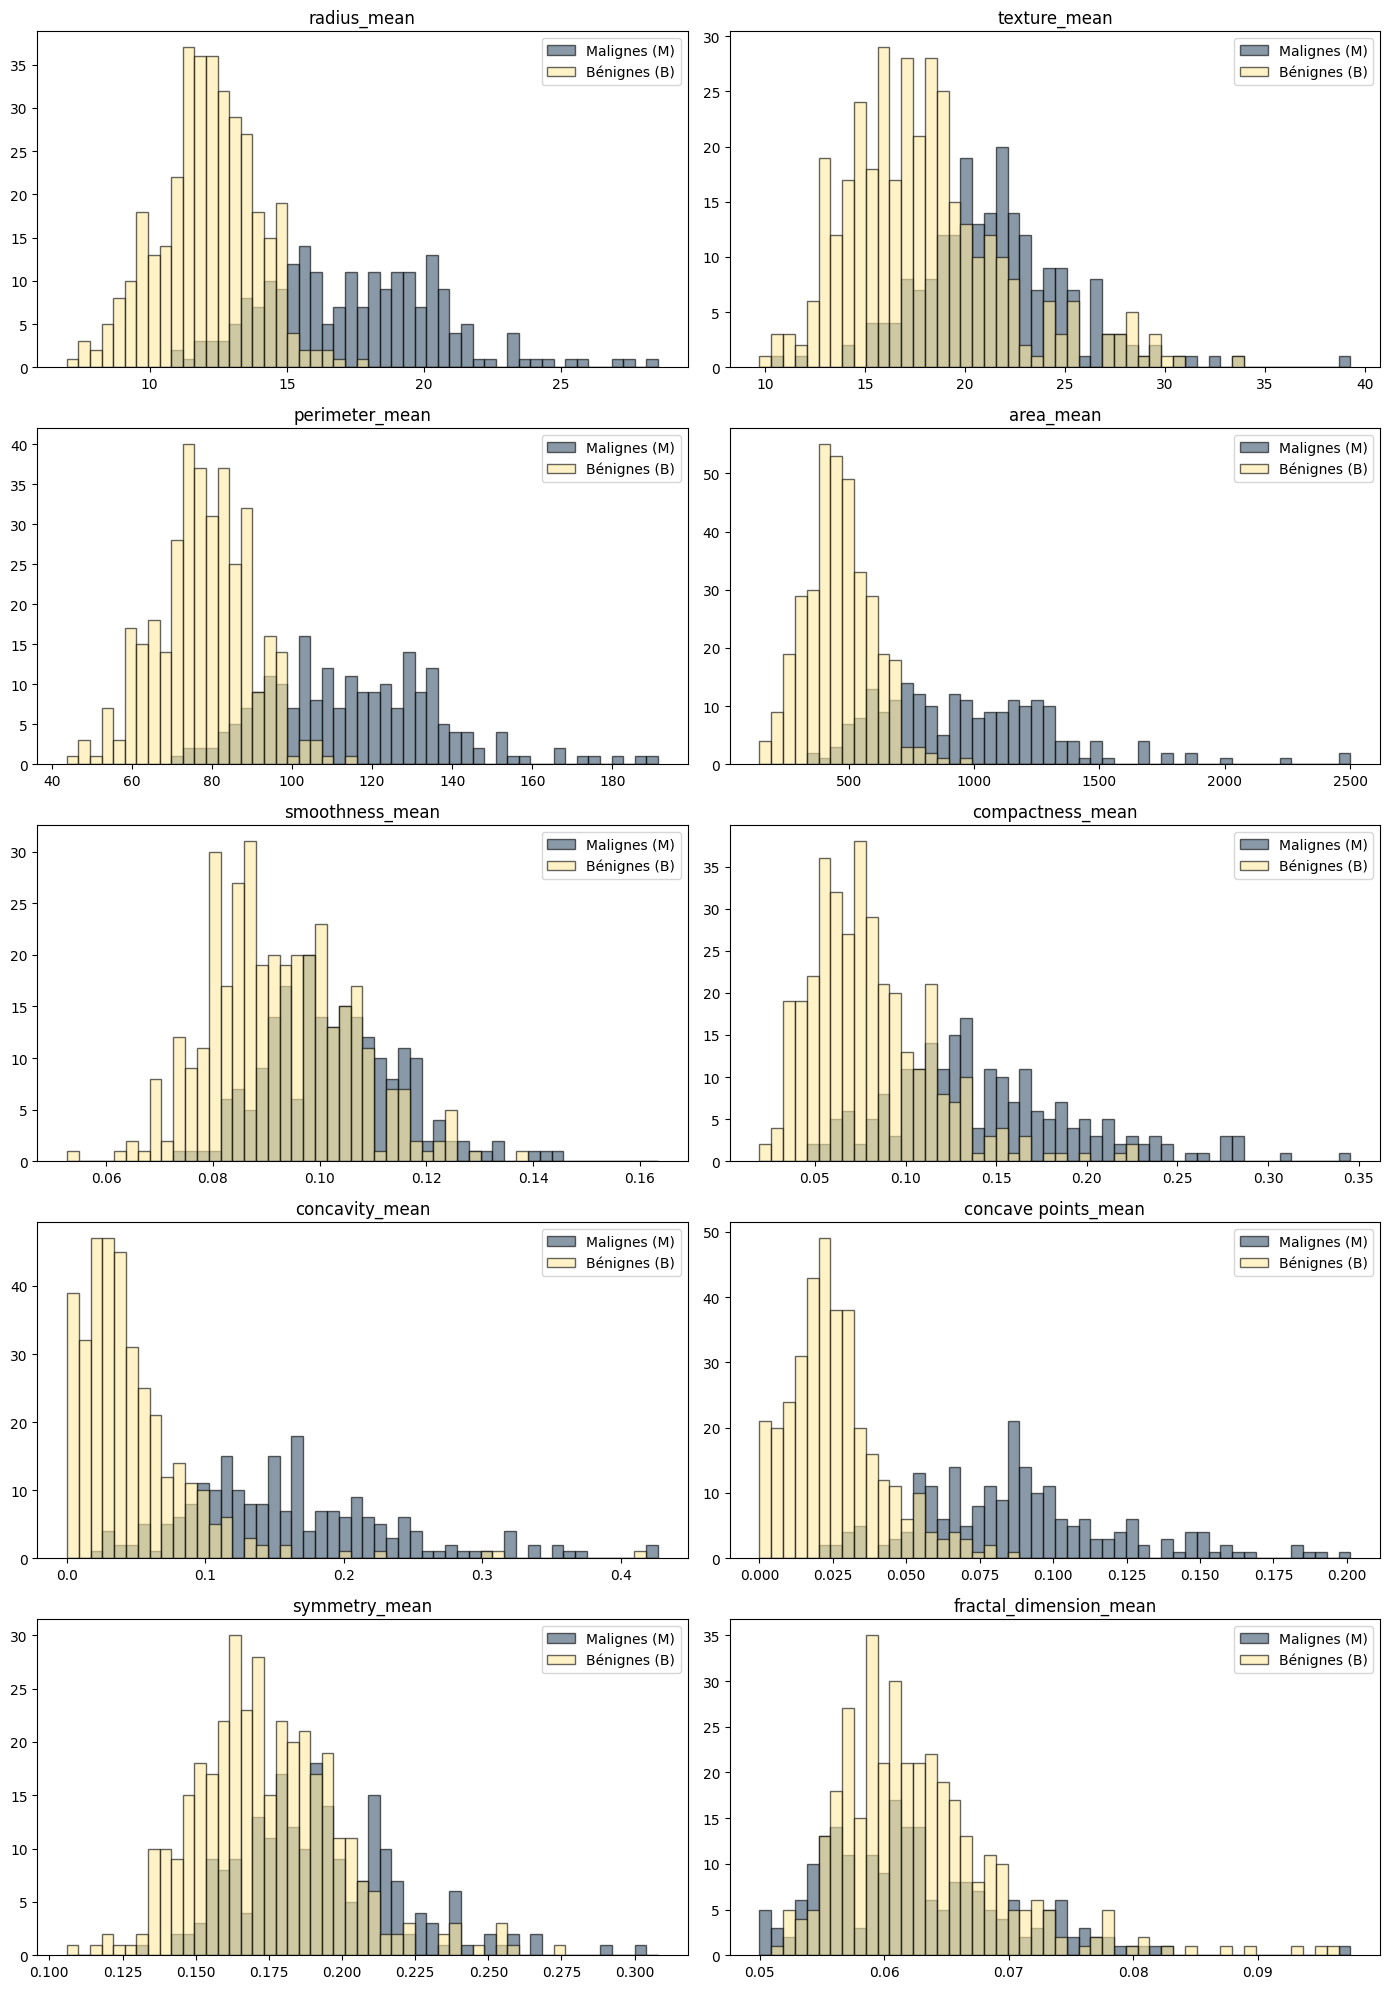

In [46]:
# Liste contenant seulement les varibles nécessaire
variable_stat = df.columns[2:12]

# Creéation du plan : 5 lignes x 2 colonnes
fig, axes = plt.subplots(5, 2, figsize=(14, 20))
axes = axes.flatten()

for i, var in enumerate(variable_stat):
    malignes = df[df["diagnosis"] == "M"][var]
    benignes = df[df["diagnosis"] == "B"][var]

    # Le bins est propre à chaque variable. Donc pour garantir un affichge 
    # de qualité ey homogène. On calcul le meilleur bins pour chaque varible
    
    # Calcul du min et max global pour les deux distributions
    vmin = min(malignes.min(), benignes.min())
    vmax = max(malignes.max(), benignes.max())

    # Définir un pas de classe
    step = (vmax - vmin) / 50
    bins = np.arange(vmin, vmax + step, step)

    # Tracer les deux histogrammes
    axes[i].hist(
        malignes,
        bins=bins,
        color=bleu,
        alpha=0.6,
        label="Malignes (M)",
        edgecolor="black",
    )
    axes[i].hist(
        benignes,
        bins=bins,
        color=jaune,
        alpha=0.6,
        label="Bénignes (B)",
        edgecolor="black",
    )

    axes[i].set_title(f"{var}")
    axes[i].legend()

plt.tight_layout()
plt.show()

## Question 5 : A partir de la figure précédente et d'une analyse argumentée, en déduire quelles variables pourraient, a priori, être discriminantes pour déterminer l'état de la tumeur.